In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
image_dir = Path('C:/Users/REJITH JACOB/Desktop/Prodigy Infotech/Task 5/food-101/food-101/images')


In [6]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images = pd.concat([filepaths, labels], axis=1)

category_samples = []
for category in images['Label'].unique():
    category_slice = images.query("Label == @category")
    category_samples.append(category_slice.sample(100, random_state=1))
image_df = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [8]:
image_df['Label'].value_counts()

Label
paella                  100
red_velvet_cake         100
baby_back_ribs          100
shrimp_and_grits        100
cup_cakes               100
                       ... 
takoyaki                100
pad_thai                100
fried_rice              100
strawberry_shortcake    100
apple_pie               100
Name: count, Length: 101, dtype: int64

In [9]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [10]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [11]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 5656 validated image filenames belonging to 101 classes.
Found 1414 validated image filenames belonging to 101 classes.
Found 3030 validated image filenames belonging to 101 classes.


In [12]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(101, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


print(model.summary())

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 151s 803ms/step - accuracy: 0.5186 - loss: 1.8350 - val_accuracy: 0.3904 - val_loss: 2.4399
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 149s 835ms/step - accuracy: 0.6337 - loss: 1.4015 - val_accuracy: 0.4059 - val_loss: 2.3747
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 143s 801ms/step - accuracy: 0.7319 - loss: 1.0405 - val_accuracy: 0.4151 - val_loss: 2.4408
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 141s 792ms/step - accuracy: 0.7801 - loss: 0.8398 - val_accuracy: 0.4059 - val_loss: 2.6221
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 141s 793ms/step - accuracy: 0.8454 - loss: 0.6204 - val_accuracy: 0.4081 - val_loss: 2.5779


In [21]:
results = model.evaluate(test_images, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 41.75%


Label: red_velvet_cake, Calories: 500


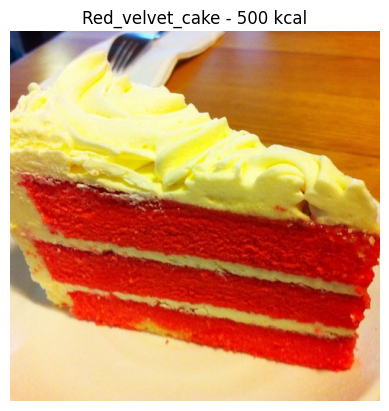

Label: beef_carpaccio, Calories: 250


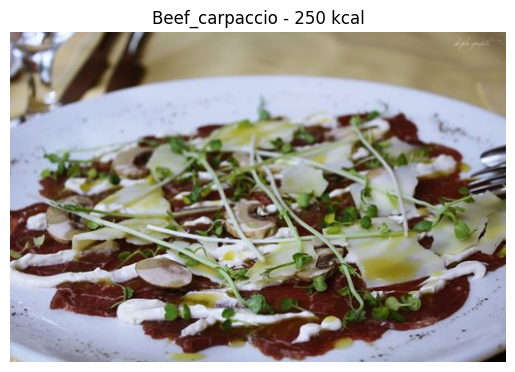

Label: hot_dog, Calories: 300


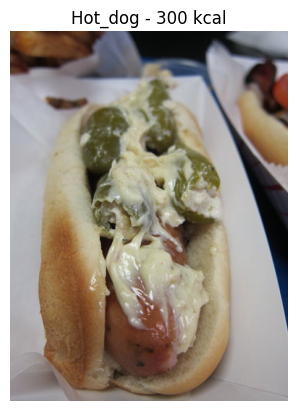

Label: hot_dog, Calories: 300


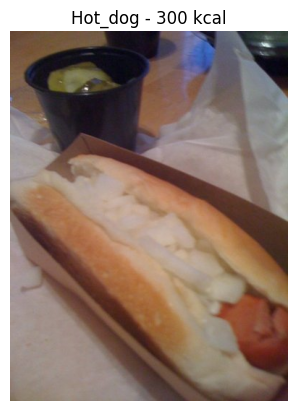

Label: donuts, Calories: 300


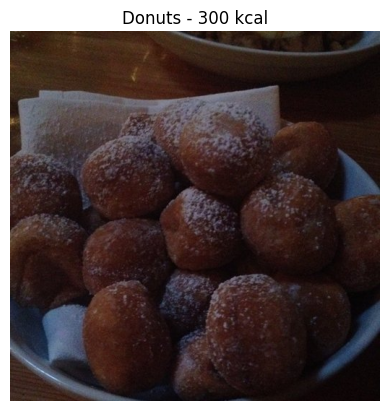

In [78]:
calories_dict = {
    'apple_pie': 300,'baby_back_ribs': 400,'baklava': 350,'beef_carpaccio': 250,'beef_tartare': 350, 'beet_salad': 150,'beignets': 250,'bibimbap': 550,'bread_pudding': 350,
    'breakfast_burrito': 650,'bruschetta': 200,'caesar_salad': 350,'cannoli': 250,'caprese_salad': 250,'carrot_cake': 450,'ceviche': 200,'cheesecake': 500,'cheese_plate': 600,
    'chicken_curry': 450,'chicken_quesadilla': 500,'chicken_wings': 700,'chocolate_cake': 550,'chocolate_mousse': 450,'churros': 300,'clam_chowder': 300,'club_sandwich': 700,
    'crab_cakes': 350,'creme_brulee': 300,'croque_madame': 500,'cup_cakes': 400,'deviled_eggs': 200,'donuts': 300,'dumplings': 250,'edamame': 150,'eggs_benedict': 550,
    'escargots': 150,'falafel': 300,'filet_mignon': 400,'fish_and_chips': 700,'foie_gras': 500,'french_fries': 350,'french_onion_soup': 300,'french_toast': 450,
    'fried_calamari': 400,'fried_rice': 600,'frozen_yogurt': 200,'garlic_bread': 200,'gnocchi': 400,'greek_salad': 250,'grilled_cheese_sandwich': 600,'grilled_salmon': 450,
    'guacamole': 250,'gyoza': 200,'hamburger': 700,'hot_and_sour_soup': 150,'hot_dog': 300,'huevos_rancheros': 600,'hummus': 250,'ice_cream': 300,'lasagna': 600,
    'lobster_bisque': 350,'lobster_roll_sandwich': 450,'macaroni_and_cheese': 600,'macarons': 150,'miso_soup': 100,'mussels': 250,'nachos': 750,'omelette': 350,
    'onion_rings': 400,'oysters': 150,'pad_thai': 600,'paella': 500,'pancakes': 500,'panna_cotta': 300,'peking_duck': 550,'pho': 450,'pizza': 400,'pork_chop': 500,
    'poutine': 700,'prime_rib': 600,'pulled_pork_sandwich': 650,'ramen': 500,'ravioli': 450,'red_velvet_cake': 500,'risotto': 500,'samosa': 300,'sashimi': 250,
    'scallops': 300,'seaweed_salad': 100,'shrimp_and_grits': 450,'spaghetti_bolognese': 600,'spaghetti_carbonara': 700,'spring_rolls': 200,'steak': 600,'strawberry_shortcake': 400,
    'sushi': 350,'tacos': 350,'takoyaki': 300,'tiramisu': 500,'tuna_tartare': 250,'waffles': 400
    }

# Display 5 random images with their labels and calorie content
for i in range(5):
    sample = image_df.sample(1).iloc[0]  
    img_path = sample['Filepath']        
    img = plt.imread(img_path)           
    label = sample['Label']              
    
# Ensure the label is in the same format as the keys in the dictionary
    calories = calories_dict.get(label.lower(), 'calories_dict')  
    
    print(f"Label: {label}, Calories: {calories}")  # Debug print
    
    plt.imshow(img)                     
    plt.title(f"{label.capitalize()} - {calories} kcal")  
    plt.axis('off')                      
    plt.show()                           